In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import ARIMA                              # for determining ARIMA orders


# Load a non-stationary dataset
df1 = pd.read_csv('tempandq2.csv',index_col='date',parse_dates=True)
df1.index.freq = 'D'

In [3]:
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

In [2]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [5]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

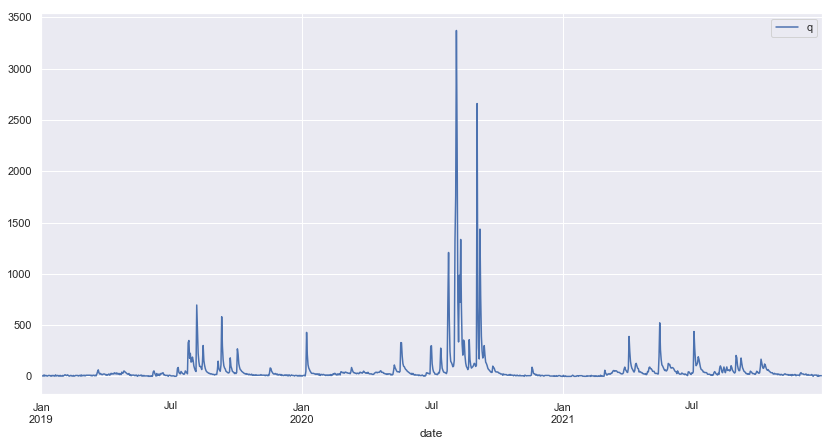

In [8]:
df1.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(df1):
    # Dickey-Fuller test
    result = adfuller(df1, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

    

check_adfuller(df1)

Test statistic:  -6.237034931044398
p-value:  4.797608142441914e-08
Critical Values: {'1%': -3.436402509014354, '5%': -2.8642124318084456, '10%': -2.568192893555997}


In [24]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [69]:
auto_arima(df1['q'],seasonal=True,m=12).summary()

KeyboardInterrupt: 

In [29]:
len(df1)

1096

In [31]:
# Set one year for testing
train = df1.iloc[:822]
test = df1.iloc[822:]

In [33]:
model = SARIMAX(train['q'],order=(2,0,3),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    q   No. Observations:                  822
Model:             SARIMAX(2, 0, 3)x(1, 0, [1], 12)   Log Likelihood               -5308.912
Date:                              Tue, 09 Aug 2022   AIC                          10633.823
Time:                                      16:21:28   BIC                          10671.517
Sample:                                  01-01-2019   HQIC                         10648.285
                                       - 04-01-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3491      0.066      5.264      0.000       0.219       0.479
ar.L2          0.5490      0.046     12.053      0.000       0.460       0.638
ma.L1          0.3560      0.067      5.287      0.000       0.224       0.488
ma.L2         -0.3692      0.023    -16.407      0.000      -0.413      -0.325
ma.L3         -0.3958      0.019    -21.270      0.000      -0.432      -0.359
ar.S.L12      -0.5398      0.331     -1.629      0.103      -1.189       0.110
ma.S.L12       0.6236      0.321      1.943      0.052      -0.006       1.253
sigma2       2.38e+04    182.312    130.555      0.000    2.34e+04    2.42e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            724409.84
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              19.35   Skew:                             9.03
Prob(H) (two-sided):                  0.00   Kurtosis:                       147.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['q'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) RMSE Error: 80.14000675


In [48]:
pred_y2=results.forecast(steps=7)

In [49]:
pred_y2

2021-04-02    40.132105
2021-04-03    32.682546
2021-04-04    33.135218
2021-04-05    28.344305
2021-04-06    28.666926
Freq: D, Name: predicted_mean, dtype: float64

In [52]:
test_y2=test[0:7]

In [53]:
test_y2

,q
date,
2021-04-02,38.120
2021-04-03,78.457
2021-04-04,389.262
2021-04-05,242.339
2021-04-06,145.385


In [60]:
from math import sqrt

In [64]:
pred_y=results.forecast(steps=3)
test_y=test[0:3]
rmse= sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

207.3046342515889


In [65]:
pred_y2=results.forecast(steps=7)
test_y2=test[0:7]
rmse2= sqrt(mean_squared_error(pred_y2, test_y2))
print(rmse2)

167.9131680202784


In [66]:
pred_y3=results.forecast(steps=30)
test_y3=test[0:30]
rmse3= sqrt(mean_squared_error(pred_y3, test_y3))
print(rmse3)

90.78286529825286
